In [165]:
import pandas as pd
import os
import json
import numpy as np

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

## Get bad apples

In [167]:
err=pd.read_csv("/nrnb/users/mpagadal/immunotherapy-trials/scripts/err/featurecounts.err",header=None)

In [168]:
err["sample_id"]=err[0].str.split(".").str[4]
err["sample_id"]=err["sample_id"].astype(int)
err["percent"]=err[0].str.split("(").str[1]
err["percent"]=err["percent"].str.split("%").str[0]
err["percent"]=err["percent"].astype(float)

In [169]:
ids="SRR2779596 SRR6468347 SRR6468265 SRR5088829 SRR6450206 SRR6468342 SRR6504589 SRR5088905 SRR3184301 SRR3184295 SRR6450230 SRR5088826 SRR6447681 SRR2661602 SRR5088894 SRR3184304 SRR6468304 SRR6461175 SRR6461161 SRR2660032 SRR5088871 SRR3184291 SRR6504590 SRR2757338 SRR2779183 SRR6468316 SRR6468320 SRR5088926 SRR2779097 SRR6461151 SRR5088816 SRR5088906 SRR6468343 SRR3184294 SRR6447677 SRR5088903 SRR5088909 SRR6461173 SRR3184300 SRR5088896 SRR5088814 SRR7475534 SRR6468330 SRR2679013 SRR2778361 SRR6461168 SRR5088915 SRR2712420 SRR6468313 SRR2775133 SRR2771617 SRR2665516 SRR5088813 SRR2669446 SRR2778056 SRR2717684 SRR6450222 SRR3184283 SRR5088841 SRR5088916 SRR5088877 SRR6468341 SRR5088885 SRR6504588 SRR6461171 SRR5088887 SRR6450189 SRR6468321 SRR5088854 SRR6447678 SRR5088918 SRR6504580 SRR6468314 SRR6461169 SRR5088872 SRR6450195 SRR6504841 SRR2674135 SRR6468325 SRR6450191 SRR5088819 SRR6504591 SRR5088836 SRR7475553 SRR5088882 SRR5088867 SRR2753064 SRR5088830 SRR5088878 SRR6461177 SRR5088892 SRR6461147 SRR5088924 SRR5088847 SRR6504584 SRR6468339 SRR5088880 SRR6468312 SRR5088920 SRR5088895 SRR2755094 SRR6468264 SRR5088929 SRR5088850 SRR2773626 SRR6504582 SRR5088851 SRR6461160 SRR5088856 SRR6461181 SRR7475532 SRR6468266 SRR5088904 SRR5088862 SRR6468306 SRR7526866 SRR6468346 SRR2780299 SRR6450228 SRR6468375 SRR5088857 SRR6468311 SRR6447676 SRR6511549 SRR6468344 SRR6461170 SRR5088822 SRR6491482 SRR6461157 SRR2771207 SRR6461165 SRR6461159 SRR5088835 SRR5088860 SRR2780275 SRR5088845 SRR7475545 SRR5088852 SRR6450232 SRR5088831 SRR6889242 SRR6504583 SRR5088853 SRR3184303 SRR6468328 SRR6468326 SRR6468319 SRR3184293 SRR2774280 SRR6447680 SRR2701663 SRR5088837 SRR7475552 SRR6504587 SRR6468335 SRR6468332 SRR2689710 SRR3184302 SRR6461179 SRR6450198 SRR7475519 SRR2777326 SRR6468317 SRR6461182 SRR3184281 SRR5088890 SRR6461166 SRR5088914 SRR5088828 SRR2703695 SRR6468301 SRR6461163 SRR3184285 SRR6468334 SRR5088839 SRR6468309 SRR7475518 SRR3184306 SRR3184297 SRR6450201 SRR7475533 SRR2751521 SRR6450202 SRR5088913 SRR2777217 SRR2727854 SRR6468318 SRR6461174 SRR2681702 SRR6468322 SRR6468324 SRR5088899 SRR5088900 SRR5088820 SRR6511548 SRR5088858 SRR6468373 SRR5088883 SRR6468374 SRR6450226 SRR6461152 SRR7475535 SRR5088886 SRR2757072 SRR6461167 SRR6450199 SRR6511553 SRR2700736 SRR6461180 SRR6468345 SRR5088922 SRR2778609 SRR3184305 SRR6468303 SRR6461143 SRR7475517 SRR5088865 SRR6461150 SRR5088833 SRR6504840 SRR6461153 SRR5088919 SRR6450205 SRR3184299 SRR6450194 SRR3083584 SRR6461172 SRR6450197 SRR6461145 SRR5088917 SRR2778466 SRR5088927 SRR6468310 SRR7475525 SRR5088842 SRR6468315 SRR5088840 SRR6468323 SRR5088823 SRR5088908 SRR5088879 SRR6450223 SRR3184290 SRR3184282 SRR6461178 SRR6468307 SRR6447690 SRR3184288 SRR3184284 SRR5088907 SRR3184296 SRR5088827 SRR5088864 SRR2774182 SRR6450231 SRR6504839 SRR6450225 SRR6461156 SRR5088893 SRR2771331 SRR2771286 SRR7475551 SRR2675767 SRR6447675 SRR6468300 SRR2777065 SRR6504838 SRR6461149 SRR6504837 SRR5088925 SRR5088846 SRR3184292 SRR5088855 SRR5088861 SRR6461146 SRR5088838 SRR5088930 SRR6450203 SRR5088874 SRR6461164 SRR5088859 SRR7526841 SRR6468337 SRR6450204 SRR5088817 SRR5088821 SRR5088891 SRR6468263 SRR3184279 SRR5088849 SRR6511552 SRR6461148 SRR5088911 SRR5088824 SRR5088834 SRR5088912 SRR6450224 SRR2774183 SRR6468267 SRR6450193 SRR2771707 SRR5088818 SRR5088888 SRR2770872 SRR5088843 SRR2778078 SRR5088928 SRR5088844 SRR6461176 SRR6504585 SRR6468305 SRR5088825 SRR3184298 SRR3184287 SRR7475531 SRR5088897 SRR5088898 SRR2780123 SRR3184286 SRR6511550 SRR6468348 SRR6461158 SRR6450190 SRR5088848 SRR6468336 SRR6468331 SRR2672095 SRR6468302 SRR6461144 SRR2661579 SRR6461142 SRR3083781 SRR6450200 SRR6468308 SRR6468338 SRR5088870 SRR6511551 SRR6450196 SRR6468333 SRR6468327 SRR2772780 SRR5088921 SRR5088923 SRR3184280 SRR6450192 SRR3184289 SRR2689711 SRR6461155 SRR5088866 SRR5088889 SRR6461162 SRR5088815 SRR6450227 SRR5088832 SRR2774418 SRR6450229 SRR5088910 SRR6468340 SRR6461154 SRR6504581 SRR6504586 SRR6468329 SRR5088873 SRR6504836 SRR2777976"

In [170]:
dic={}

for i,x in enumerate(ids.split(" ")):
    dic[i+1]=x

In [171]:
err["id"]=err["sample_id"].map(dic)

In [172]:
good_rna=err[err["percent"]>50]["id"].tolist()

## Get counts

In [173]:
directory="/nrnb/users/mpagadal/immunotherapy-trials/rna/featurecounts2/"

In [174]:
files=[x for x in os.listdir(directory) if x.endswith(".counts")]

In [175]:
compiled=pd.read_csv(directory+files[0],delimiter="\t",comment="#")

for i,x in enumerate(files[1:]):
    if i % 10 == 0:
        print(i)
    df=pd.read_csv(directory+x,delimiter="\t",comment="#")
    compiled=pd.merge(compiled,df,on=["Geneid","Chr","Start","End","Strand","Length"])
    

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360


In [176]:
#extract gene length from featureCounts dataframe
mp_length=dict(zip(compiled["Geneid"],compiled["Length"]))

In [177]:
compiled.columns=[x.split("/")[-1].split("Aligned.sortedByCoord.out.bam")[0] for x in compiled.columns] #reformat columns
compiled.drop(['Chr','Start','End','Strand','Length'], 
           axis=1, inplace=True)
compiled=compiled.set_index("Geneid")
compiled.head()

,SRR7475535.sra,SRR6468263.sra,SRR5088877.sra,SRR5088874.sra,SRR5088898.sra,SRR5088840.sra,SRR5088854.sra,SRR6468307.sra,SRR6468344.sra,SRR6461154.sra,...,SRR5088822.sra,SRR6468316.sra,SRR6468302.sra,SRR5088896.sra,SRR3184299.sra,SRR6461181.sra,SRR5088850.sra,SRR3184304.sra,SRR2774183.sra,SRR2775133.sra
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.4,0,465,1,0,0,0,0,0,673,428,...,0,830,683,0,0,777,0,0,32,3
ENSG00000227232.4,0,650,64,120,40,47,57,0,868,683,...,46,1296,948,64,426,1099,96,302,109,77
ENSG00000243485.2,0,4,0,0,0,0,0,0,3,4,...,0,2,3,0,0,6,0,0,25,0
ENSG00000237613.2,0,9,0,0,0,0,0,0,8,20,...,0,22,10,0,0,28,0,0,0,0
ENSG00000268020.2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


### Get conditions and groups

In [137]:
df=pd.DataFrame({"ids":compiled.columns.tolist()}) #get count dataframe columns
df=df.set_index("ids")
df.index=df.index.str.split(".").str[0]

In [138]:
#get mapping file
mapping=pd.read_csv("/nrnb/users/carterlab/immunotherapy-trials/wxs_rna_mapping_table.tsv",delimiter="\t")
mapping=mapping[~(mapping["tumor RNA id"].isnull())]
mp_geno2rna=dict(zip(mapping["tumor RNA id"],mapping["normal WXS id"]))

In [139]:
mp_study=dict(zip(mapping["tumor RNA id"],mapping["study"]))
mp_time=dict(zip(mapping["tumor RNA id"],mapping["Biopsy Time"]))

In [140]:
df["study"]=df.index.map(mp_study)
df["time"]=df.index.map(mp_time)

In [141]:
df_pre=df[~df["time"].isin(["On","on-treatment"])]

In [142]:
df_pre["nml wxs"]=df_pre.index.map(mp_geno2rna)

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
df_norm=df_pre[~df_pre["nml wxs"].isnull()]

In [144]:
mp_response=dict(zip(mapping["normal WXS id"],mapping["partial.sd.coding"]))

In [145]:
df_norm["response"]=df_norm["nml wxs"].map(mp_response)
mp={2:"RESPONDER",1:"NONRESPONDER"}
df_norm["response"]=df_norm["response"].map(mp)

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [146]:
df_norm.index=df_norm.index+".sra"

In [147]:
df_norm["study"].value_counts()

riaz        46
vanallen    40
miao        33
hugo        26
Name: study, dtype: int64

In [148]:
df_norm=df_norm[(df_norm["study"]=="riaz")]

In [149]:
bad=[]

for y in compiled_test.columns:
    if y.split(".")[0] not in good_rna:
        bad.append(y)

In [150]:
df_norm_clean=df_norm[~(df_norm.index.isin(bad))]

In [152]:
df_norm_clean.to_csv("../data/deseq2.conditions.txt")

In [153]:
compiled[df_norm_clean.index.tolist()].to_csv("../data/deseq2.counts.txt")

## Get DESeq2 results

In [154]:
deseq2=pd.read_csv("../data/DESeq2.responder.notresponder.riaz.csv")

In [155]:
with open('/cellar/users/mpagadal/Data/resources/tcga/ensembl_map.json', 'r') as f:
    ensembl = json.load(f)

In [156]:
ensembl={k.split(".")[0]:v for k,v in ensembl.items()}

In [157]:
deseq2["Unnamed: 0"]=deseq2["Unnamed: 0"].str.split(".").str[0]
deseq2["gene name"]=deseq2["Unnamed: 0"].map(ensembl)

In [158]:
deseq2["-log10p"]=-np.log10(deseq2["padj"])

In [159]:
deseq2.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene name,-log10p
0,ENSG00000223972,0.333932,-0.209140,2.962339,-0.070599,0.943717,NaN,DDX11L1,NaN
1,ENSG00000227232,84.692952,-0.148756,0.222867,-0.667464,0.504476,0.974525,WASH7P,0.011207
2,ENSG00000238009,3.065353,-0.589673,0.733822,-0.803564,0.421649,0.965466,RP11-34P13.7,0.015263
3,ENSG00000233750,0.305262,-0.066008,1.352826,-0.048793,0.961084,NaN,CICP27,NaN
4,ENSG00000237683,36.685130,-0.104531,0.384350,-0.271967,0.785647,0.987867,NaN,0.005301


In [160]:
icb=pd.read_csv("/cellar/users/mpagadal/Data2/projects/germline-immune/disease-relevance/data/icb-snps.tsv",delimiter="\t")
odds=pd.read_csv("/cellar/users/mpagadal/Data/projects/germline-immune/disease-relevance/data/TIME.icb.OR.tsv",delimiter="\t",header=None,skiprows=[2])

In [161]:
genes=icb[icb["-log10(fdr)"]>1]["file"].tolist()

In [162]:
df_label=deseq2[deseq2["gene name"].isin(genes)].sort_values(by="padj")

In [163]:
df_label.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene name,-log10p
6537,ENSG00000018280,712.271418,-1.372801,0.476145,-2.883156,0.003937,0.294912,SLC11A1,0.530308
11864,ENSG00000164308,3073.185583,1.222987,0.512533,2.386164,0.017025,0.506957,ERAP2,0.295029
36711,ENSG00000186818,60.260838,2.011194,0.931727,2.158565,0.030884,0.625692,LILRB4,0.203639
8937,ENSG00000175166,7987.976681,-0.166905,0.117252,-1.423472,0.154599,0.870057,PSMD2,0.060452
36701,ENSG00000131042,15.318300,0.979865,0.958780,1.021991,0.306785,0.946702,LILRB2,0.023787


Text(0.5, 1.0, 'riaz responder vs. nonresponder')

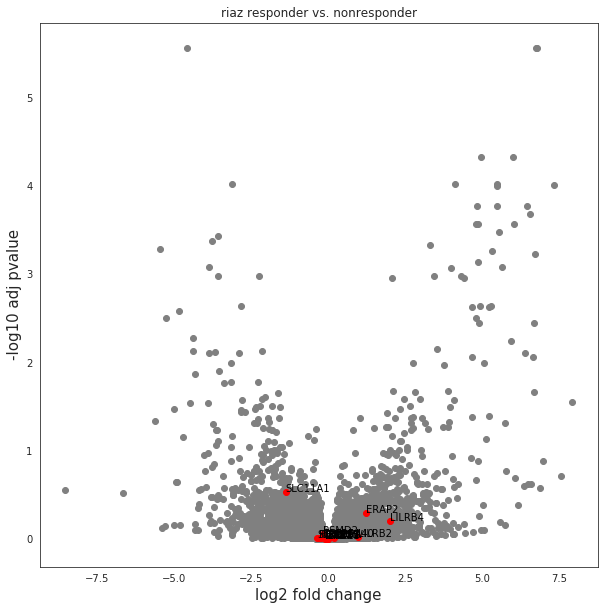

In [164]:
f=plt.figure(figsize=(10,10))
plt.scatter(deseq2["log2FoldChange"],deseq2["-log10p"],color="gray")
for i,row in df_label.iterrows():
    plt.scatter(row["log2FoldChange"],row["-log10p"],color="red")
    plt.text(float(row["log2FoldChange"]),float(row["-log10p"]),row["gene name"],color="black")
plt.ylabel("-log10 adj pvalue",fontsize=15)
plt.xlabel("log2 fold change",fontsize=15)
plt.title("riaz responder vs. nonresponder")   
    